## 6. VAR Modeling

This script covers the VAR modelind and Granger causality analysis to understand the drives factors for cryptocurrency price movements

In [44]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import acf, grangercausalitytests, pacf
import utils

In [45]:
summarised_all = pd.read_csv('input_model_file_new.csv')
summarised_all=summarised_all.drop(columns='Unnamed: 0')
summarised_all.head()

,Date,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,uniq_tweet_vol,avg_tweet_len,...,Negative_share,Open_prices,High_prices,Low_prices,Close_prices,Volume_BTC,polarity,pct_change,direction,Close
0,2021-07-01 00:00:00,0.029129,0.836432,0.134196,0.303921,1419.020244,1.408293,4100,2226,131.943902,...,0.083659,35040.355,35104.565,34716.810,34736.550,5.756833e+06,0.062521,NaN,NaN,34502.0
1,2021-07-01 01:00:00,0.028587,0.845381,0.125752,0.280544,1900.329994,1.473011,3594,2041,131.055648,...,0.085142,34746.335,35037.370,34733.715,34961.495,3.252340e+06,0.059957,0.006476,1.0,34502.0
2,2021-07-01 02:00:00,0.025111,0.833500,0.141384,0.320735,1689.920310,1.349238,4003,2186,130.661254,...,0.075943,34949.460,34960.680,34229.515,34320.675,5.981050e+06,0.059584,-0.018329,0.0,34502.0
3,2021-07-01 03:00:00,0.028438,0.831342,0.139967,0.312858,1946.256461,0.811630,4024,2136,133.565358,...,0.087227,34324.925,34419.610,34131.020,34131.020,3.109104e+06,0.063090,-0.005526,0.0,34502.0
4,2021-07-01 04:00:00,0.034749,0.821632,0.142275,0.297292,1810.257934,1.342926,3718,2304,136.608392,...,0.114578,34124.455,34346.205,34037.685,34338.375,5.322490e+06,0.070313,0.006075,1.0,34502.0


In [46]:
summarised_all.columns

Index(['Date', 'avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr', 'avg_cmp_scr',
       'avg_retweet_cnt', 'avg_like_cnt', 'tweet_vol', 'uniq_tweet_vol',
       'avg_tweet_len', 'avg_followers_cnt', 'negative', 'neutral', 'positive',
       'Bullish_Ratio', 'Negative_share', 'Open_prices', 'High_prices',
       'Low_prices', 'Close_prices', 'Volume_BTC', 'polarity', 'pct_change',
       'direction', 'Close'],
      dtype='object')

In [47]:
df_var = summarised_all[['Date', 'avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr',
       'avg_cmp_scr', 'avg_retweet_cnt', 'avg_like_cnt', 'tweet_vol',
       'avg_tweet_len', 'avg_followers_cnt',  'Bullish_Ratio',
       'Negative_share', 'Open_prices', 'High_prices',
       'Low_prices', 'Close_prices', 'Volume_BTC', 'polarity', 
       'pct_change', 'Close']]
df_var['Date']=pd.to_datetime(df_var['Date'])

<ipython-input-47-065fe7219298>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['Date']=pd.to_datetime(df_var['Date'])


In [48]:
df_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1104 non-null   datetime64[ns]
 1   avg_neg_scr        1104 non-null   float64       
 2   avg_neu_scr        1104 non-null   float64       
 3   avg_pos_scr        1104 non-null   float64       
 4   avg_cmp_scr        1104 non-null   float64       
 5   avg_retweet_cnt    1104 non-null   float64       
 6   avg_like_cnt       1104 non-null   float64       
 7   tweet_vol          1104 non-null   int64         
 8   avg_tweet_len      1104 non-null   float64       
 9   avg_followers_cnt  1104 non-null   float64       
 10  Bullish_Ratio      1104 non-null   float64       
 11  Negative_share     1104 non-null   float64       
 12  Open_prices        1104 non-null   float64       
 13  High_prices        1104 non-null   float64       
 14  Low_pric

In [49]:
df_var = df_var.fillna(0)
df_var.head()

,Date,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,avg_tweet_len,avg_followers_cnt,Bullish_Ratio,Negative_share,Open_prices,High_prices,Low_prices,Close_prices,Volume_BTC,polarity,pct_change,Close
0,2021-07-01 00:00:00,0.029129,0.836432,0.134196,0.303921,1419.020244,1.408293,4100,131.943902,2278.782927,6.810496,0.083659,35040.355,35104.565,34716.810,34736.550,5.756833e+06,0.062521,0.000000,34502.0
1,2021-07-01 01:00:00,0.028587,0.845381,0.125752,0.280544,1900.329994,1.473011,3594,131.055648,1647.005008,6.133987,0.085142,34746.335,35037.370,34733.715,34961.495,3.252340e+06,0.059957,0.006476,34502.0
2,2021-07-01 02:00:00,0.025111,0.833500,0.141384,0.320735,1689.920310,1.349238,4003,130.661254,1866.353735,7.796053,0.075943,34949.460,34960.680,34229.515,34320.675,5.981050e+06,0.059584,-0.018329,34502.0
3,2021-07-01 03:00:00,0.028438,0.831342,0.139967,0.312858,1946.256461,0.811630,4024,133.565358,1691.715209,6.780627,0.087227,34324.925,34419.610,34131.020,34131.020,3.109104e+06,0.063090,-0.005526,34502.0
4,2021-07-01 04:00:00,0.034749,0.821632,0.142275,0.297292,1810.257934,1.342926,3718,136.608392,1950.739914,5.000000,0.114578,34124.455,34346.205,34037.685,34338.375,5.322490e+06,0.070313,0.006075,34502.0


### Essential Functions for running the tests

#### Descriptive statistics

In [50]:
def descriptive_statistics(df, series):
    stats = df[series].describe()    
    print('\nDescriptive Statistics for', '\'' + series + '\'', '\n\n', stats)

In [51]:
def get_graphics(df, series, xlabel, ylabel, title, grid = True):
    plt.plot(pd.to_datetime(df.index), df[series])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(grid)
    return plt.show()

#### Stationary tests

For modeling the multivariate time series, unit root test is performed to identify non-stationary variables and take differences of the evolving variables to reduce the bias induced by these variables. If there is a bias, t-statistics tests in the model won’t be reliable. Both Augmented Dicker-Fuller (ADF) and KPSS tests are performed to check for stationarity of the series

unit root = statistical properties of series are not constant with time.

In order to be stationary, series has to be constant with time. So if a series has a unit root, it is not stationary

strict stationary = mean, variance, covariance are not function of time
trend stationary = no root unit, but has a trend. if you remove the trend, it would be strict stationary
difference stationary = series can be made strict stationary by differencing

**1.ADF Augmented Dickey Fuller Test (unit root test)**

According to the ADF test, null hypothesis is that the series has a unit root and alternate hypothesis states that the series has no unit root. 

We accept the null hypothesis when t-score is greater than the critical value which means there is a unit root and series is non stationary. Otherwise we reject the null which means the series is stationary

adf can be interpreted as a difference stationary test

In [52]:
# ADF Augmented Dickey Fuller Test
def adf_test(df, series):
    results = adfuller(df[series])
    output = pd.Series(results[0:4], index = ['t-score', 'p-value', '# of lags used', '# of observations'])
    for key, value in results[4].items():
        output['critical value (%s)' %key] = value
    # if t-score < critical value at 5%, the data is stationary
    # if t-score > critical value at 5%, the data is NOT stationary
    if output[0] < output[5]:
        print('\nADF: The data', '\'' + series + '\'', 'is STATIONARY \n\n', output)
    elif output[0] > output[5]:
        print('\nADF: The data', '\'' + series + '\'', 'is NOT STATIONARY \n\n', output)
    else:
        print('\nADF: There is something wrong with', '\'' + series + '\'','\n\n', output)

#### KPSS Kwiatkowski-Phillips-Schmidt-Shin Test (stationary test)

Here the null hypothesis is opposite and it states that the series has a stationary trend and alternate hypothesis is that the series has a unit root and is non-stationary

So, we accept null hypothesis when t-score is less than critical value (series is stationary)
We reject null when t-score is greater than the critical value (series is not stationary

kpss classifies a series as stationary on the absence of a unit root
(both strict stationary and trend stationary will be classified as stationary)

In [53]:
# KPSS Kwiatkowski-Phillips-Schmidt-Shin Test (stationary test)
def kpss_test(df, series):
    results = kpss(df[series], regression = 'ct')
    output = pd.Series(results[0:3], index = ['t-score', 'p-value', '# lags used'])              
    for key, value in results[3].items():
        output['critical value (%s)' %key] = value
    # if t-score < critical value at 5%, the data is stationary
    # if t-score > critical value at 5%, the data is NOT stationary
    if output[0] < output[4]:
        print('\nKPSS: The data', '\'' + series + '\'', 'is STATIONARY \n\n', output)
    elif output[0] > output[4]:
        print('\nKPSS: The data', '\'' + series + '\'', 'is NOT STATIONARY \n\n', output)
    else:
        print('\nKPSS: There is something wrong with', '\'' + series + '\'', '\n\n', output)

In [54]:
def series_analysis(df, series, xlabel, ylabel, title, grid = True):
    # descriptive stats
    descriptive_statistics(df, series)
    # graphics
    get_graphics(df, series, xlabel, ylabel, title, grid = True)
    # stationary tests
    adf_test(df, series)
    kpss_test(df, series)

In [55]:
###transforming variables
stationary = pd.DataFrame()

### Running test for variables

In [56]:
df_var =  df_var.drop_duplicates(subset=['Date'])

df_var=df_var[df_var['Date']>='2021-07-01'].set_index('Date')
df_var.shape

(1104, 19)

In [57]:
df_var

,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,avg_tweet_len,avg_followers_cnt,Bullish_Ratio,Negative_share,Open_prices,High_prices,Low_prices,Close_prices,Volume_BTC,polarity,pct_change,Close
Date,,,,,,,,,,,,,,,,,,,
2021-07-01 00:00:00,0.029129,0.836432,0.134196,0.303921,1419.020244,1.408293,4100,131.943902,2278.782927,6.810496,0.083659,35040.355,35104.565,34716.810,34736.550,5.756833e+06,0.062521,0.000000,34502.00
2021-07-01 01:00:00,0.028587,0.845381,0.125752,0.280544,1900.329994,1.473011,3594,131.055648,1647.005008,6.133987,0.085142,34746.335,35037.370,34733.715,34961.495,3.252340e+06,0.059957,0.006476,34502.00
2021-07-01 02:00:00,0.025111,0.833500,0.141384,0.320735,1689.920310,1.349238,4003,130.661254,1866.353735,7.796053,0.075943,34949.460,34960.680,34229.515,34320.675,5.981050e+06,0.059584,-0.018329,34502.00
2021-07-01 03:00:00,0.028438,0.831342,0.139967,0.312858,1946.256461,0.811630,4024,133.565358,1691.715209,6.780627,0.087227,34324.925,34419.610,34131.020,34131.020,3.109104e+06,0.063090,-0.005526,34502.00
2021-07-01 04:00:00,0.034749,0.821632,0.142275,0.297292,1810.257934,1.342926,3718,136.608392,1950.739914,5.000000,0.114578,34124.455,34346.205,34037.685,34338.375,5.322490e+06,0.070313,0.006075,34502.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-15 19:00:00,0.020004,0.886233,0.093512,0.189928,1479.697062,2.005611,12118,112.603813,2447.683611,4.211832,0.086483,46329.255,46463.200,46122.600,46363.635,4.551455e+06,0.043250,0.000752,35515.38
2021-08-15 20:00:00,0.017180,0.891562,0.090345,0.188267,1091.580356,2.880646,11026,117.506077,3543.118447,5.212711,0.069926,46379.555,46776.460,46308.835,46728.140,4.681822e+06,0.039397,0.007862,35515.38
2021-08-15 21:00:00,0.028455,0.877236,0.093807,0.176528,1177.105057,4.322597,9966,114.005619,2751.287477,3.153138,0.119908,46747.400,47006.160,46501.210,46874.315,4.948540e+06,0.051665,0.003128,35515.38


In [58]:
df_var['pct_change'] = df_var['pct_change']+1

In [59]:
df_var.columns

Index(['avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr', 'avg_cmp_scr',
       'avg_retweet_cnt', 'avg_like_cnt', 'tweet_vol', 'avg_tweet_len',
       'avg_followers_cnt', 'Bullish_Ratio', 'Negative_share', 'Open_prices',
       'High_prices', 'Low_prices', 'Close_prices', 'Volume_BTC', 'polarity',
       'pct_change', 'Close'],
      dtype='object')

In [60]:
df_var_log=pd.DataFrame()

#### take log transformations of the series 


Descriptive Statistics for 'avg_neg_scr' 

 count    1104.000000
mean       -4.008652
std         0.318724
min        -5.276283
25%        -4.215572
50%        -4.015748
75%        -3.808407
max        -2.334158
Name: avg_neg_scr, dtype: float64


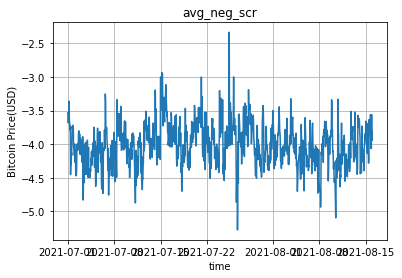


ADF: The data 'avg_neg_scr' is STATIONARY 

 t-score                   -5.638652
p-value                    0.000001
# of lags used            15.000000
# of observations       1088.000000
critical value (1%)       -3.436375
critical value (5%)       -2.864200
critical value (10%)      -2.568186
dtype: float64

KPSS: The data 'avg_neg_scr' is NOT STATIONARY 

 t-score                   0.329394
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_neu_scr' 

 count    1104.000000
mean       -0.141194
std         0.028743
min        -0.326398
25%        -0.158417
50%        -0.140241
75%        -0.123607
max        -0.058396
Name: avg_neu_scr, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


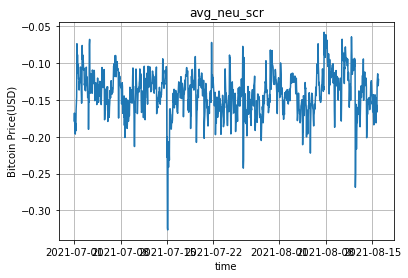


ADF: The data 'avg_neu_scr' is STATIONARY 

 t-score                -8.904898e+00
p-value                 1.144864e-14
# of lags used          3.000000e+00
# of observations       1.100000e+03
critical value (1%)    -3.436309e+00
critical value (5%)    -2.864171e+00
critical value (10%)   -2.568171e+00
dtype: float64

KPSS: The data 'avg_neu_scr' is NOT STATIONARY 

 t-score                   0.206934
p-value                   0.013400
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_pos_scr' 

 count    1104.000000
mean       -2.213280
std         0.211947
min        -3.069234
25%        -2.343655
50%        -2.202080
75%        -2.068594
max        -1.395307
Name: avg_pos_scr, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


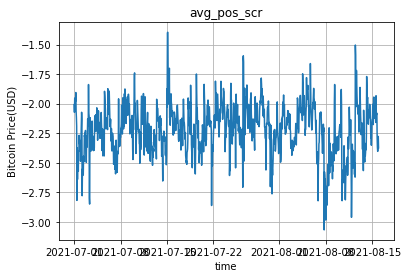


ADF: The data 'avg_pos_scr' is STATIONARY 

 t-score                   -4.396174
p-value                    0.000301
# of lags used            21.000000
# of observations       1082.000000
critical value (1%)       -3.436408
critical value (5%)       -2.864215
critical value (10%)      -2.568194
dtype: float64

KPSS: The data 'avg_pos_scr' is NOT STATIONARY 

 t-score                   0.164727
p-value                   0.034394
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_cmp_scr' 

 count    1104.000000
mean       -1.477337
std         0.245222
min        -2.524130
25%        -1.626669
50%        -1.461777
75%        -1.305903
max        -0.703349
Name: avg_cmp_scr, dtype: float64

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


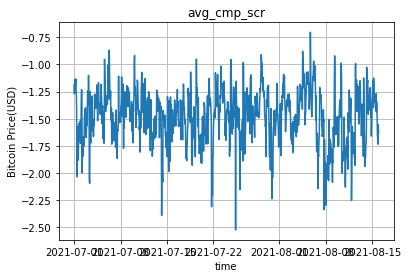

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'avg_cmp_scr' is STATIONARY 

 t-score                -9.549985e+00
p-value                 2.587404e-16
# of lags used          3.000000e+00
# of observations       1.100000e+03
critical value (1%)    -3.436309e+00
critical value (5%)    -2.864171e+00
critical value (10%)   -2.568171e+00
dtype: float64

KPSS: The data 'avg_cmp_scr' is STATIONARY 

 t-score                   0.069647
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_retweet_cnt' 

 count    1104.000000
mean        7.591395
std         0.504680
min         6.089155
25%         7.237103
50%         7.566932
75%         7.917060
max         9.598068
Name: avg_retweet_cnt, dtype: float64


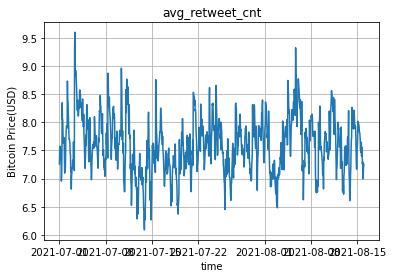


ADF: The data 'avg_retweet_cnt' is STATIONARY 

 t-score                   -3.530060
p-value                    0.007248
# of lags used            21.000000
# of observations       1082.000000
critical value (1%)       -3.436408
critical value (5%)       -2.864215
critical value (10%)      -2.568194
dtype: float64

KPSS: The data 'avg_retweet_cnt' is NOT STATIONARY 

 t-score                   0.172497
p-value                   0.027919
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_like_cnt' 

 count    1104.000000
mean        0.665472
std         0.521346
min        -1.077529
25%         0.340856
50%         0.650136
75%         0.963679
max         3.248507
Name: avg_like_cnt, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


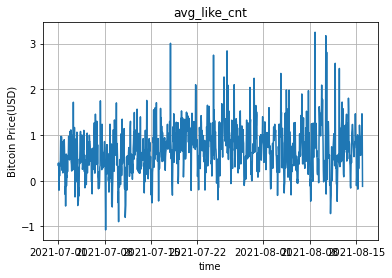

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)



ADF: The data 'avg_like_cnt' is STATIONARY 

 t-score                   -3.800935
p-value                    0.002898
# of lags used            22.000000
# of observations       1081.000000
critical value (1%)       -3.436414
critical value (5%)       -2.864217
critical value (10%)      -2.568196
dtype: float64

KPSS: The data 'avg_like_cnt' is NOT STATIONARY 

 t-score                   0.442602
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'tweet_vol' 

 count    1104.000000
mean        9.114917
std         0.551726
min         7.862497
25%         8.653339
50%         9.221528
75%         9.517917
max        10.876178
Name: tweet_vol, dtype: float64


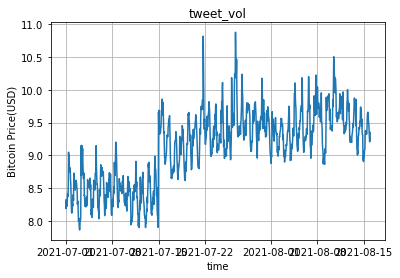

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)



ADF: The data 'tweet_vol' is NOT STATIONARY 

 t-score                   -1.671179
p-value                    0.446020
# of lags used            21.000000
# of observations       1082.000000
critical value (1%)       -3.436408
critical value (5%)       -2.864215
critical value (10%)      -2.568194
dtype: float64

KPSS: The data 'tweet_vol' is NOT STATIONARY 

 t-score                   0.546241
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_tweet_len' 

 count    1104.000000
mean        4.748867
std         0.107748
min         3.993785
25%         4.731148
50%         4.770954
75%         4.802834
max         5.008079
Name: avg_tweet_len, dtype: float64


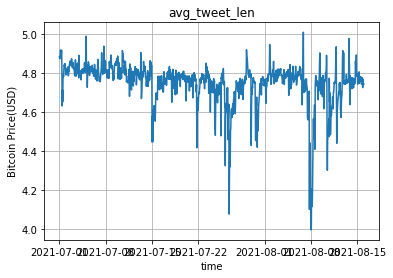

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'avg_tweet_len' is STATIONARY 

 t-score                -6.754204e+00
p-value                 2.899466e-09
# of lags used          3.000000e+00
# of observations       1.100000e+03
critical value (1%)    -3.436309e+00
critical value (5%)    -2.864171e+00
critical value (10%)   -2.568171e+00
dtype: float64

KPSS: The data 'avg_tweet_len' is STATIONARY 

 t-score                   0.126170
p-value                   0.086723
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_followers_cnt' 

 count    1104.000000
mean        7.894373
std         0.357352
min         6.928071
25%         7.662467
50%         7.883542
75%         8.129816
max         9.596055
Name: avg_followers_cnt, dtype: float64


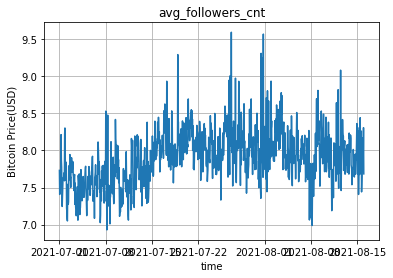

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)



ADF: The data 'avg_followers_cnt' is NOT STATIONARY 

 t-score                   -2.602898
p-value                    0.092400
# of lags used            22.000000
# of observations       1081.000000
critical value (1%)       -3.436414
critical value (5%)       -2.864217
critical value (10%)      -2.568196
dtype: float64

KPSS: The data 'avg_followers_cnt' is NOT STATIONARY 

 t-score                   0.712124
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Bullish_Ratio' 

 count    1104.000000
mean        1.789018
std         0.408396
min        -0.470178
25%         1.542185
50%         1.799828
75%         2.049447
max         3.006390
Name: Bullish_Ratio, dtype: float64


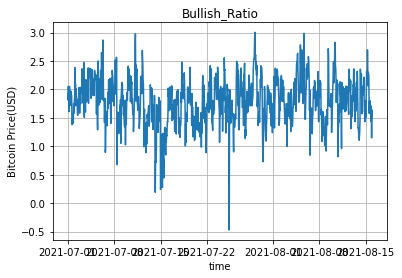

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)



ADF: The data 'Bullish_Ratio' is STATIONARY 

 t-score                -9.961051e+00
p-value                 2.373102e-17
# of lags used          2.000000e+00
# of observations       1.101000e+03
critical value (1%)    -3.436303e+00
critical value (5%)    -2.864169e+00
critical value (10%)   -2.568170e+00
dtype: float64

KPSS: The data 'Bullish_Ratio' is NOT STATIONARY 

 t-score                   0.221998
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Negative_share' 

 count    1104.000000
mean       -2.574502
std         0.355913
min        -3.778114
25%        -2.804774
50%        -2.580994
75%        -2.366265
max        -0.762082
Name: Negative_share, dtype: float64


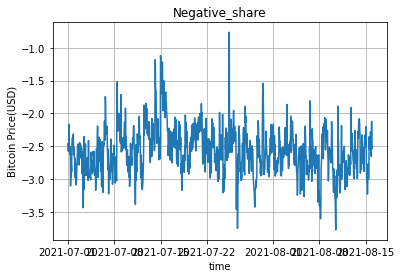

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)



ADF: The data 'Negative_share' is STATIONARY 

 t-score                -9.380425e+00
p-value                 6.981360e-16
# of lags used          2.000000e+00
# of observations       1.101000e+03
critical value (1%)    -3.436303e+00
critical value (5%)    -2.864169e+00
critical value (10%)   -2.568170e+00
dtype: float64

KPSS: The data 'Negative_share' is NOT STATIONARY 

 t-score                   0.300701
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Open_prices' 

 count    1104.000000
mean       10.513744
std         0.134783
min        10.289394
25%        10.401922
50%        10.453588
75%        10.620113
max        10.775733
Name: Open_prices, dtype: float64


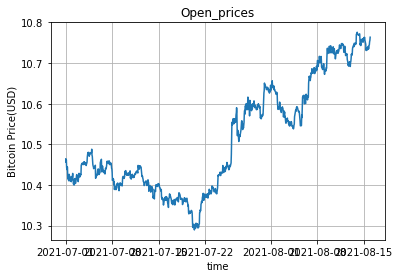

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)



ADF: The data 'Open_prices' is NOT STATIONARY 

 t-score                    0.039869
p-value                    0.961708
# of lags used             0.000000
# of observations       1103.000000
critical value (1%)       -3.436293
critical value (5%)       -2.864164
critical value (10%)      -2.568167
dtype: float64

KPSS: The data 'Open_prices' is NOT STATIONARY 

 t-score                   0.860326
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'High_prices' 

 count    1104.000000
mean       10.519191
std         0.135345
min        10.298896
25%        10.406522
50%        10.457645
75%        10.627538
max        10.782819
Name: High_prices, dtype: float64


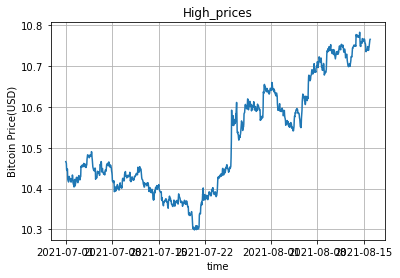

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)



ADF: The data 'High_prices' is NOT STATIONARY 

 t-score                   -0.215622
p-value                    0.936634
# of lags used             1.000000
# of observations       1102.000000
critical value (1%)       -3.436298
critical value (5%)       -2.864166
critical value (10%)      -2.568168
dtype: float64

KPSS: The data 'High_prices' is NOT STATIONARY 

 t-score                   0.853013
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Low_prices' 

 count    1104.000000
mean       10.508505
std         0.134406
min        10.285014
25%        10.397164
50%        10.449438
75%        10.614491
max        10.769867
Name: Low_prices, dtype: float64


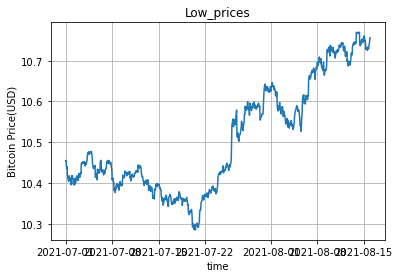


ADF: The data 'Low_prices' is NOT STATIONARY 

 t-score                   -0.104792
p-value                    0.948959
# of lags used             1.000000
# of observations       1102.000000
critical value (1%)       -3.436298
critical value (5%)       -2.864166
critical value (10%)      -2.568168
dtype: float64

KPSS: The data 'Low_prices' is NOT STATIONARY 

 t-score                   0.86413
p-value                   0.01000
# lags used              22.00000
critical value (10%)      0.11900
critical value (5%)       0.14600
critical value (2.5%)     0.17600
critical value (1%)       0.21600
dtype: float64

Descriptive Statistics for 'Close_prices' 

 count    1104.000000
mean       10.514026
std         0.134968
min        10.289641
25%        10.401946
50%        10.453473
75%        10.620355
max        10.775792
Name: Close_prices, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


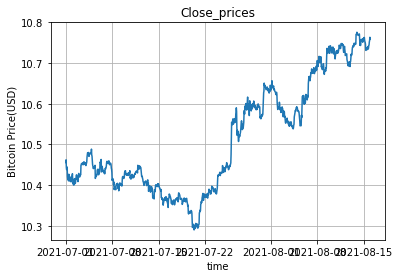


ADF: The data 'Close_prices' is NOT STATIONARY 

 t-score                   -0.004762
p-value                    0.958136
# of lags used             0.000000
# of observations       1103.000000
critical value (1%)       -3.436293
critical value (5%)       -2.864164
critical value (10%)      -2.568167
dtype: float64

KPSS: The data 'Close_prices' is NOT STATIONARY 

 t-score                   0.857664
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Volume_BTC' 

 count    1104.000000
mean       15.515424
std         0.740944
min        13.648785
25%        14.978232
50%        15.430922
75%        15.991725
max        18.302373
Name: Volume_BTC, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


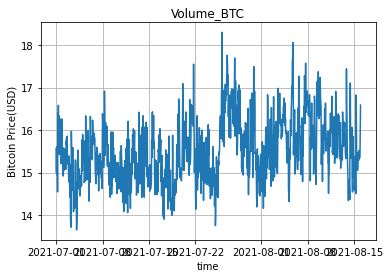

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'Volume_BTC' is STATIONARY 

 t-score                   -3.081080
p-value                    0.027985
# of lags used            21.000000
# of observations       1082.000000
critical value (1%)       -3.436408
critical value (5%)       -2.864215
critical value (10%)      -2.568194
dtype: float64

KPSS: The data 'Volume_BTC' is STATIONARY 

 t-score                   0.128149
p-value                   0.083057
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'polarity' 

 count    1104.000000
mean       -3.110966
std         0.200046
min        -3.959576
25%        -3.215246
50%        -3.104988
75%        -2.994355
max        -2.407497
Name: polarity, dtype: float64


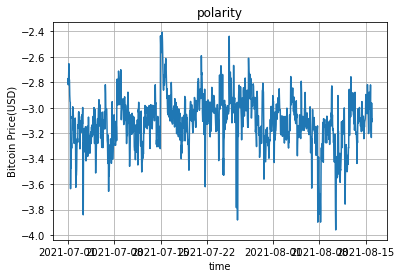

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)



ADF: The data 'polarity' is STATIONARY 

 t-score                   -5.557749
p-value                    0.000002
# of lags used            11.000000
# of observations       1092.000000
critical value (1%)       -3.436353
critical value (5%)       -2.864190
critical value (10%)      -2.568181
dtype: float64

KPSS: The data 'polarity' is NOT STATIONARY 

 t-score                   0.335734
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'pct_change' 

 count    1104.000000
mean        0.000274
std         0.007170
min        -0.041577
25%        -0.003212
50%         0.000193
75%         0.003724
max         0.042113
Name: pct_change, dtype: float64


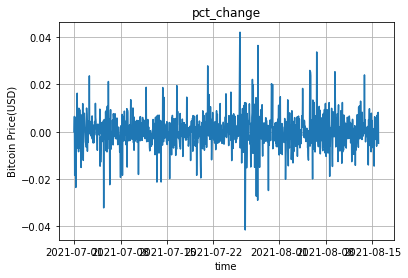

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'pct_change' is STATIONARY 

 t-score                  -32.498753
p-value                    0.000000
# of lags used             0.000000
# of observations       1103.000000
critical value (1%)       -3.436293
critical value (5%)       -2.864164
critical value (10%)      -2.568167
dtype: float64

KPSS: The data 'pct_change' is STATIONARY 

 t-score                   0.060451
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Close' 

 count    1104.000000
mean       10.461237
std         0.008668
min        10.426974
25%        10.456980
50%        10.461258
75%        10.465602
max        10.478561
Name: Close, dtype: float64


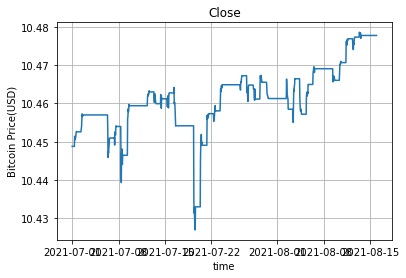


ADF: The data 'Close' is NOT STATIONARY 

 t-score                   -2.173645
p-value                    0.215949
# of lags used             6.000000
# of observations       1097.000000
critical value (1%)       -3.436325
critical value (5%)       -2.864178
critical value (10%)      -2.568175
dtype: float64

KPSS: The data 'Close' is NOT STATIONARY 

 t-score                   0.291261
p-value                   0.010000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,avg_tweet_len,avg_followers_cnt,Bullish_Ratio,Negative_share,Open_prices,High_prices,Low_prices,Close_prices,Volume_BTC,polarity,pct_change,Close
Date,,,,,,,,,,,,,,,,,,,
2021-07-01 00:00:00,-3.536037,-0.178610,-2.008457,-1.190988,7.257722,0.342378,8.318742,4.882377,7.731397,1.918465,-2.481012,10.464256,10.466086,10.454979,10.455548,15.565898,-2.772247,0.000000,10.448773
2021-07-01 01:00:00,-3.554820,-0.167968,-2.073445,-1.271026,7.549783,0.387308,8.187021,4.875622,7.406714,1.813845,-2.463436,10.455829,10.464170,10.455466,10.462003,14.994885,-2.814132,0.006455,10.448773
2021-07-01 02:00:00,-3.684463,-0.182121,-1.956276,-1.137141,7.432437,0.299540,8.294799,4.872608,7.531742,2.053618,-2.577772,10.461658,10.461979,10.440844,10.443503,15.604107,-2.820369,-0.018499,10.448773
2021-07-01 03:00:00,-3.560033,-0.184714,-1.966347,-1.162006,7.573663,-0.208710,8.300032,4.894591,7.433498,1.914070,-2.439245,10.443627,10.446382,10.437962,10.437962,14.949845,-2.763190,-0.005541,10.448773
2021-07-01 04:00:00,-3.359611,-0.196463,-1.949996,-1.213039,7.501225,0.294851,8.220941,4.917118,7.575964,1.609438,-2.166502,10.437770,10.444247,10.435224,10.444019,15.487452,-2.654803,0.006057,10.448773


In [61]:
col_list=[ 
       'avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr', 'avg_cmp_scr',
       'avg_retweet_cnt', 'avg_like_cnt', 'tweet_vol', 'avg_tweet_len',
       'avg_followers_cnt', 'Bullish_Ratio', 'Negative_share', 'Open_prices',
       'High_prices', 'Low_prices', 'Close_prices', 'Volume_BTC', 'polarity',
       'pct_change', 'Close']
for metric_name in df_var[col_list]:
    metric = df_var[metric_name]
    
    df_var_log[metric_name] = df_var[metric_name].apply(np.log).dropna()
# run tests to see if stationary
    series_analysis(df_var_log,metric_name, xlabel = 'time', ylabel = 'Bitcoin Price(USD)', title = metric_name)

df_var_log.head()


Descriptive Statistics for 'avg_neg_scr' 

 count    1103.000000
mean       -0.000242
std         0.248315
min        -1.311405
25%        -0.152049
50%        -0.001157
75%         0.138340
max         1.567364
Name: avg_neg_scr, dtype: float64


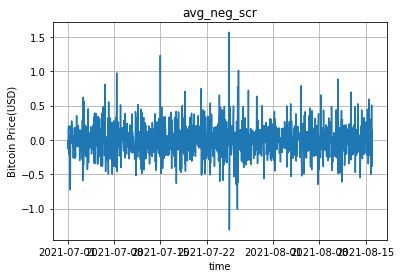


ADF: The data 'avg_neg_scr' is STATIONARY 

 t-score                -1.165571e+01
p-value                 1.987872e-21
# of lags used          2.200000e+01
# of observations       1.080000e+03
critical value (1%)    -3.436419e+00
critical value (5%)    -2.864220e+00
critical value (10%)   -2.568197e+00
dtype: float64

KPSS: The data 'avg_neg_scr' is STATIONARY 

 t-score                   0.018615
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_neu_scr' 

 count    1103.000000
mean        0.000051
std         0.020257
min        -0.172413
25%        -0.009131
50%         0.000183
75%         0.010518
max         0.138945
Name: avg_neu_scr, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


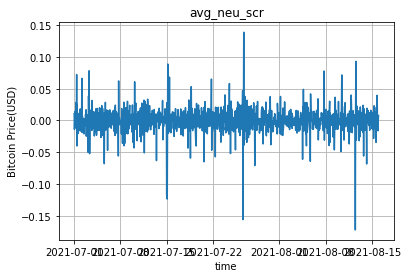


ADF: The data 'avg_neu_scr' is STATIONARY 

 t-score                -1.110356e+01
p-value                 3.812074e-20
# of lags used          2.000000e+01
# of observations       1.082000e+03
critical value (1%)    -3.436408e+00
critical value (5%)    -2.864215e+00
critical value (10%)   -2.568194e+00
dtype: float64

KPSS: The data 'avg_neu_scr' is STATIONARY 

 t-score                   0.016085
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_pos_scr' 

 count    1103.000000
mean       -0.000332
std         0.151441
min        -0.863677
25%        -0.080528
50%        -0.004313
75%         0.070467
max         1.118527
Name: avg_pos_scr, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


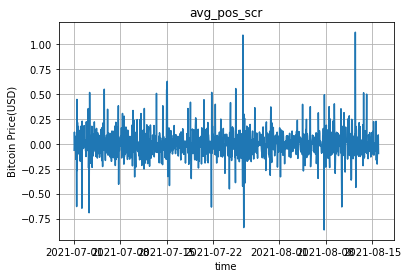

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'avg_pos_scr' is STATIONARY 

 t-score                -1.200109e+01
p-value                 3.345343e-22
# of lags used          2.000000e+01
# of observations       1.082000e+03
critical value (1%)    -3.436408e+00
critical value (5%)    -2.864215e+00
critical value (10%)   -2.568194e+00
dtype: float64

KPSS: The data 'avg_pos_scr' is STATIONARY 

 t-score                   0.015129
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_retweet_cnt' 

 count    1103.000000
mean       -0.000005
std         0.260038
min        -0.861385
25%        -0.152356
50%        -0.020602
75%         0.118222
max         2.178650
Name: avg_retweet_cnt, dtype: float64


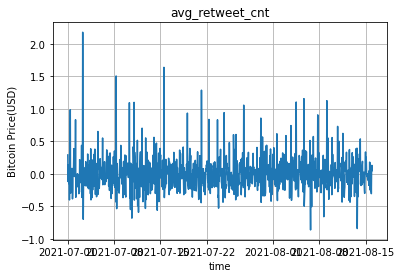


ADF: The data 'avg_retweet_cnt' is STATIONARY 

 t-score                -1.339933e+01
p-value                 4.599499e-25
# of lags used          2.000000e+01
# of observations       1.082000e+03
critical value (1%)    -3.436408e+00
critical value (5%)    -2.864215e+00
critical value (10%)   -2.568194e+00
dtype: float64

KPSS: The data 'avg_retweet_cnt' is STATIONARY 

 t-score                   0.018726
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_like_cnt' 

 count    1103.000000
mean       -0.000423
std         0.563491
min        -3.465510
25%        -0.321393
50%         0.016863
75%         0.315020
max         2.543478
Name: avg_like_cnt, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


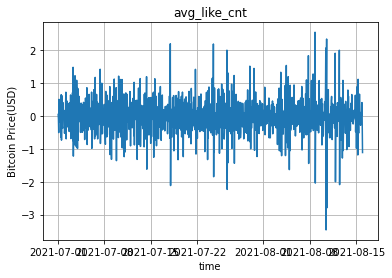

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'avg_like_cnt' is STATIONARY 

 t-score                -1.743367e+01
p-value                 4.751635e-30
# of lags used          2.200000e+01
# of observations       1.080000e+03
critical value (1%)    -3.436419e+00
critical value (5%)    -2.864220e+00
critical value (10%)   -2.568197e+00
dtype: float64

KPSS: The data 'avg_like_cnt' is STATIONARY 

 t-score                   0.017525
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'tweet_vol' 

 count    1103.000000
mean        0.000934
std         0.166457
min        -0.523902
25%        -0.092848
50%        -0.005457
75%         0.077797
max         1.727932
Name: tweet_vol, dtype: float64


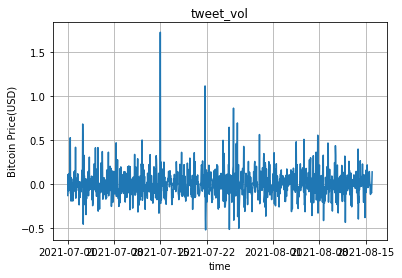

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'tweet_vol' is STATIONARY 

 t-score                -1.485483e+01
p-value                 1.754816e-27
# of lags used          2.000000e+01
# of observations       1.082000e+03
critical value (1%)    -3.436408e+00
critical value (5%)    -2.864215e+00
critical value (10%)   -2.568194e+00
dtype: float64

KPSS: The data 'tweet_vol' is STATIONARY 

 t-score                   0.022853
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_followers_cnt' 

 count    1103.000000
mean       -0.000043
std         0.334787
min        -1.735671
25%        -0.185448
50%         0.005671
75%         0.175994
max         1.956458
Name: avg_followers_cnt, dtype: float64


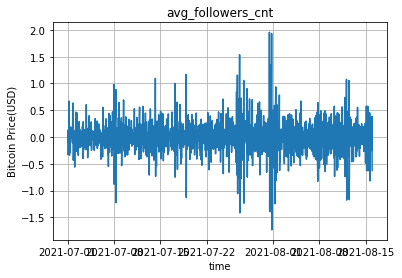

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'avg_followers_cnt' is STATIONARY 

 t-score                -1.232035e+01
p-value                 6.773113e-23
# of lags used          2.200000e+01
# of observations       1.080000e+03
critical value (1%)    -3.436419e+00
critical value (5%)    -2.864220e+00
critical value (10%)   -2.568197e+00
dtype: float64

KPSS: The data 'avg_followers_cnt' is STATIONARY 

 t-score                   0.015731
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Bullish_Ratio' 

 count    1103.000000
mean       -0.000380
std         0.311437
min        -2.222589
25%        -0.167555
50%         0.005872
75%         0.180910
max         1.788980
Name: Bullish_Ratio, dtype: float64


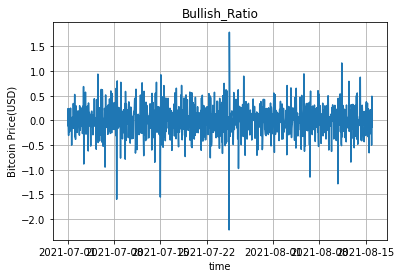

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Bullish_Ratio' is STATIONARY 

 t-score                -1.271140e+01
p-value                 1.028290e-23
# of lags used          2.200000e+01
# of observations       1.080000e+03
critical value (1%)    -3.436419e+00
critical value (5%)    -2.864220e+00
critical value (10%)   -2.568197e+00
dtype: float64

KPSS: The data 'Bullish_Ratio' is STATIONARY 

 t-score                   0.015372
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Negative_share' 

 count    1103.000000
mean       -0.000015
std         0.263975
min        -1.245689
25%        -0.155287
50%        -0.010756
75%         0.139426
max         1.754509
Name: Negative_share, dtype: float64


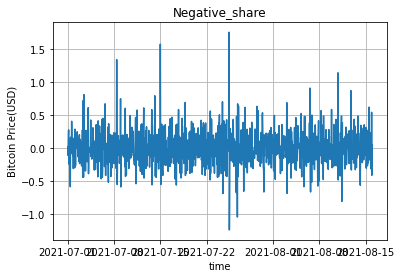


ADF: The data 'Negative_share' is STATIONARY 

 t-score                -1.173688e+01
p-value                 1.301340e-21
# of lags used          2.200000e+01
# of observations       1.080000e+03
critical value (1%)    -3.436419e+00
critical value (5%)    -2.864220e+00
critical value (10%)   -2.568197e+00
dtype: float64

KPSS: The data 'Negative_share' is STATIONARY 

 t-score                   0.013842
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Low_prices' 

 count    1103.000000
mean        0.000273
std         0.006805
min        -0.050418
25%        -0.002920
50%         0.000631
75%         0.003469
max         0.040828
Name: Low_prices, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


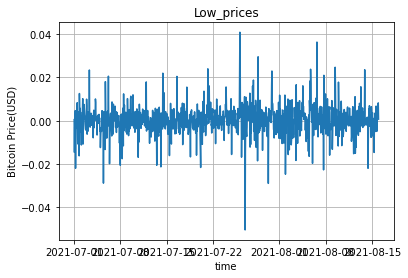


ADF: The data 'Low_prices' is STATIONARY 

 t-score                  -29.210653
p-value                    0.000000
# of lags used             0.000000
# of observations       1102.000000
critical value (1%)       -3.436298
critical value (5%)       -2.864166
critical value (10%)      -2.568168
dtype: float64

KPSS: The data 'Low_prices' is STATIONARY 

 t-score                   0.058566
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'High_prices' 

 count    1103.000000
mean        0.000271
std         0.007112
min        -0.041782
25%        -0.002966
50%        -0.000071
75%         0.003159
max         0.076449
Name: High_prices, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


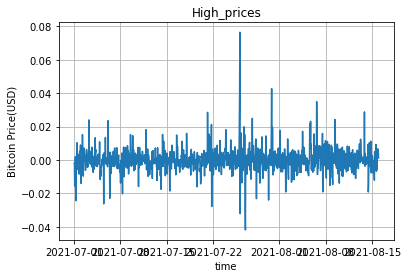


ADF: The data 'High_prices' is STATIONARY 

 t-score                  -28.876765
p-value                    0.000000
# of lags used             0.000000
# of observations       1102.000000
critical value (1%)       -3.436298
critical value (5%)       -2.864166
critical value (10%)      -2.568168
dtype: float64

KPSS: The data 'High_prices' is STATIONARY 

 t-score                   0.059681
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Open_prices' 

 count    1103.000000
mean        0.000271
std         0.007218
min        -0.042375
25%        -0.003205
50%         0.000146
75%         0.003768
max         0.042227
Name: Open_prices, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


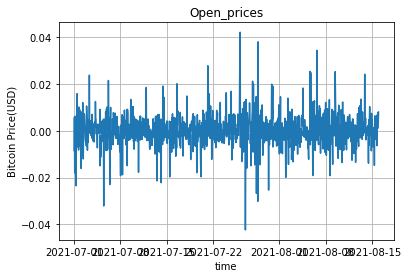

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Open_prices' is STATIONARY 

 t-score                  -32.574975
p-value                    0.000000
# of lags used             0.000000
# of observations       1102.000000
critical value (1%)       -3.436298
critical value (5%)       -2.864166
critical value (10%)      -2.568168
dtype: float64

KPSS: The data 'Open_prices' is STATIONARY 

 t-score                   0.059279
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Close_prices' 

 count    1103.000000
mean        0.000275
std         0.007173
min        -0.041577
25%        -0.003213
50%         0.000200
75%         0.003725
max         0.042113
Name: Close_prices, dtype: float64


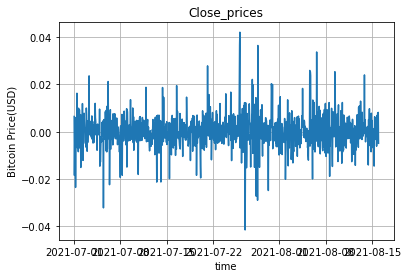

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Close_prices' is STATIONARY 

 t-score                  -32.493939
p-value                    0.000000
# of lags used             0.000000
# of observations       1102.000000
critical value (1%)       -3.436298
critical value (5%)       -2.864166
critical value (10%)      -2.568168
dtype: float64

KPSS: The data 'Close_prices' is STATIONARY 

 t-score                   0.060525
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Close' 

 count    1103.000000
mean        0.000026
std         0.001185
min        -0.019488
25%         0.000000
50%         0.000000
75%         0.000000
max         0.012256
Name: Close, dtype: float64


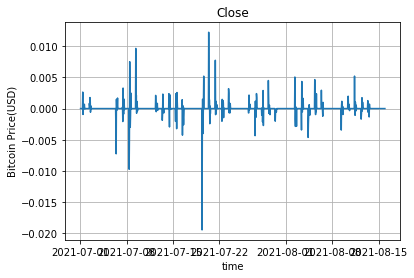

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Close' is STATIONARY 

 t-score                -1.416985e+01
p-value                 2.012144e-26
# of lags used          5.000000e+00
# of observations       1.097000e+03
critical value (1%)    -3.436325e+00
critical value (5%)    -2.864178e+00
critical value (10%)   -2.568175e+00
dtype: float64

KPSS: The data 'Close' is STATIONARY 

 t-score                   0.023649
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'polarity' 

 count    1103.000000
mean       -0.000287
std         0.144176
min        -0.923800
25%        -0.078567
50%        -0.002061
75%         0.076191
max         0.885933
Name: polarity, dtype: float64


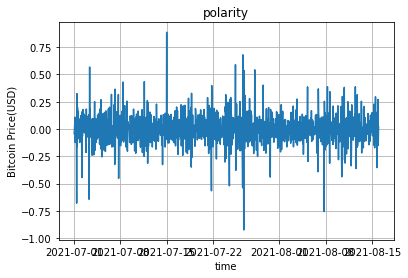


ADF: The data 'polarity' is STATIONARY 

 t-score                -1.264598e+01
p-value                 1.401485e-23
# of lags used          1.400000e+01
# of observations       1.088000e+03
critical value (1%)    -3.436375e+00
critical value (5%)    -2.864200e+00
critical value (10%)   -2.568186e+00
dtype: float64

KPSS: The data 'polarity' is STATIONARY 

 t-score                   0.018497
p-value                   0.100000
# lags used              22.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,avg_followers_cnt,Bullish_Ratio,Negative_share,Low_prices,High_prices,Open_prices,Close_prices,Close,polarity
Date,,,,,,,,,,,,,,,
2021-07-01 01:00:00,-0.018783,0.010642,-0.064988,0.292061,0.044930,-0.131721,-0.324683,-0.104620,0.017576,0.000487,-0.001916,-0.008426,0.006455,0.0,-0.041885
2021-07-01 02:00:00,-0.129643,-0.014154,0.117169,-0.117346,-0.087768,0.107778,0.125028,0.239773,-0.114336,-0.014623,-0.002191,0.005829,-0.018499,0.0,-0.006237
2021-07-01 03:00:00,0.124429,-0.002593,-0.010071,0.141226,-0.508250,0.005232,-0.098244,-0.139548,0.138526,-0.002882,-0.015598,-0.018031,-0.005541,0.0,0.057179
2021-07-01 04:00:00,0.200423,-0.011748,0.016351,-0.072438,0.503561,-0.079091,0.142466,-0.304632,0.272744,-0.002738,-0.002135,-0.005857,0.006057,0.0,0.108387
2021-07-01 05:00:00,-0.216040,0.014863,-0.030042,-0.150491,-0.192222,0.053671,-0.033337,0.235489,-0.247324,0.004648,0.002042,0.006263,0.000239,0.0,-0.123041


In [62]:
# ['price'] = log & diff
col_list=[ 'avg_neg_scr','avg_neu_scr','avg_pos_scr','avg_retweet_cnt','avg_like_cnt',
       'tweet_vol','avg_followers_cnt','Bullish_Ratio','Negative_share','Low_prices' ,'High_prices','Open_prices',
       'Close_prices', 'Close','polarity']
for metric_name in df_var_log[col_list]:
    metric = df_var_log[metric_name]
    
    stationary[metric_name] = df_var_log[metric_name].diff().dropna()
# run tests to see if stationary
    series_analysis(stationary,metric_name, xlabel = 'time', ylabel = 'Bitcoin Price(USD)', title = metric_name)

stationary.head()

In [63]:
df_var_log1 = df_var_log[1:]
df_var_log1.shape

(1103, 19)

In [64]:
# ['price'] = log & diff
col_list=[ 'avg_cmp_scr','avg_tweet_len','Volume_BTC',
        'pct_change' ]

for metric_name in df_var_log1[col_list]:
    metric = df_var_log1[metric_name]
    
    stationary[metric_name] = df_var_log1[metric_name]
# run tests to see if stationary
    #series_analysis(stationary,metric_name, xlabel = 'time', ylabel = 'Bitcoin Price(USD)', title = metric_name)

stationary.head()

,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,avg_followers_cnt,Bullish_Ratio,Negative_share,Low_prices,High_prices,Open_prices,Close_prices,Close,polarity,avg_cmp_scr,avg_tweet_len,Volume_BTC,pct_change
Date,,,,,,,,,,,,,,,,,,,
2021-07-01 01:00:00,-0.018783,0.010642,-0.064988,0.292061,0.044930,-0.131721,-0.324683,-0.104620,0.017576,0.000487,-0.001916,-0.008426,0.006455,0.0,-0.041885,-1.271026,4.875622,14.994885,0.006455
2021-07-01 02:00:00,-0.129643,-0.014154,0.117169,-0.117346,-0.087768,0.107778,0.125028,0.239773,-0.114336,-0.014623,-0.002191,0.005829,-0.018499,0.0,-0.006237,-1.137141,4.872608,15.604107,-0.018499
2021-07-01 03:00:00,0.124429,-0.002593,-0.010071,0.141226,-0.508250,0.005232,-0.098244,-0.139548,0.138526,-0.002882,-0.015598,-0.018031,-0.005541,0.0,0.057179,-1.162006,4.894591,14.949845,-0.005541
2021-07-01 04:00:00,0.200423,-0.011748,0.016351,-0.072438,0.503561,-0.079091,0.142466,-0.304632,0.272744,-0.002738,-0.002135,-0.005857,0.006057,0.0,0.108387,-1.213039,4.917118,15.487452,0.006057
2021-07-01 05:00:00,-0.216040,0.014863,-0.030042,-0.150491,-0.192222,0.053671,-0.033337,0.235489,-0.247324,0.004648,0.002042,0.006263,0.000239,0.0,-0.123041,-1.178777,4.891822,14.544870,0.000239


In [24]:
stationary.shape

(1103, 19)

#### Granger Causality test

In [25]:
def grangers_causality_matrix(data, variables, test='ssr_chi2test', maxlag=2, verbose=True):

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1], 5) for i in range(maxlag)]
            if verbose:
                print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset

df_var_granger = df_var_log1.copy()
granger = grangers_causality_matrix(df_var_granger, variables=df_var_granger.columns)

Y = avg_neg_scr, X = avg_neg_scr, P Values = [1.0, 1.0]
Y = avg_neu_scr, X = avg_neg_scr, P Values = [0.57419, 0.12131]
Y = avg_pos_scr, X = avg_neg_scr, P Values = [0.20521, 0.284]
Y = avg_cmp_scr, X = avg_neg_scr, P Values = [0.26378, 0.56575]
Y = avg_retweet_cnt, X = avg_neg_scr, P Values = [0.18693, 0.24077]
Y = avg_like_cnt, X = avg_neg_scr, P Values = [0.00078, 0.00929]
Y = tweet_vol, X = avg_neg_scr, P Values = [0.66486, 0.80092]
Y = avg_tweet_len, X = avg_neg_scr, P Values = [0.59644, 0.68525]
Y = avg_followers_cnt, X = avg_neg_scr, P Values = [0.0, 1e-05]
Y = Bullish_Ratio, X = avg_neg_scr, P Values = [0.31764, 0.65795]
Y = Negative_share, X = avg_neg_scr, P Values = [0.11279, 0.11799]
Y = Open_prices, X = avg_neg_scr, P Values = [0.84641, 0.73486]
Y = High_prices, X = avg_neg_scr, P Values = [0.25738, 0.20477]
Y = Low_prices, X = avg_neg_scr, P Values = [0.30593, 0.22408]
Y = Close_prices, X = avg_neg_scr, P Values = [0.68557, 0.8739]
Y = Volume_BTC, X = avg_neg_scr, P Values

Y = avg_tweet_len, X = avg_followers_cnt, P Values = [0.36342, 0.36726]
Y = avg_followers_cnt, X = avg_followers_cnt, P Values = [1.0, 1.0]
Y = Bullish_Ratio, X = avg_followers_cnt, P Values = [0.01682, 0.06419]
Y = Negative_share, X = avg_followers_cnt, P Values = [0.01569, 0.05287]
Y = Open_prices, X = avg_followers_cnt, P Values = [0.74399, 0.90394]
Y = High_prices, X = avg_followers_cnt, P Values = [0.28899, 0.30918]
Y = Low_prices, X = avg_followers_cnt, P Values = [0.10678, 0.28933]
Y = Close_prices, X = avg_followers_cnt, P Values = [0.66239, 0.94098]
Y = Volume_BTC, X = avg_followers_cnt, P Values = [0.44383, 0.72299]
Y = polarity, X = avg_followers_cnt, P Values = [0.00335, 0.0322]
Y = pct_change, X = avg_followers_cnt, P Values = [0.66776, 0.95512]
Y = Close, X = avg_followers_cnt, P Values = [0.45374, 0.15529]
Y = avg_neg_scr, X = Bullish_Ratio, P Values = [0.75417, 0.93666]
Y = avg_neu_scr, X = Bullish_Ratio, P Values = [0.32144, 0.16405]
Y = avg_pos_scr, X = Bullish_Ratio,

Y = avg_retweet_cnt, X = polarity, P Values = [0.42622, 0.08584]
Y = avg_like_cnt, X = polarity, P Values = [0.01247, 0.07747]
Y = tweet_vol, X = polarity, P Values = [0.33872, 0.68187]
Y = avg_tweet_len, X = polarity, P Values = [0.89617, 0.33464]
Y = avg_followers_cnt, X = polarity, P Values = [1e-05, 0.00119]
Y = Bullish_Ratio, X = polarity, P Values = [0.7817, 0.88176]
Y = Negative_share, X = polarity, P Values = [0.86843, 0.94265]
Y = Open_prices, X = polarity, P Values = [0.57484, 0.82942]
Y = High_prices, X = polarity, P Values = [0.34889, 0.39607]
Y = Low_prices, X = polarity, P Values = [0.98757, 0.46633]
Y = Close_prices, X = polarity, P Values = [0.79608, 0.91267]
Y = Volume_BTC, X = polarity, P Values = [0.2942, 0.06553]
Y = polarity, X = polarity, P Values = [1.0, 1.0]
Y = pct_change, X = polarity, P Values = [0.80997, 0.92146]
Y = Close, X = polarity, P Values = [0.93505, 0.64994]
Y = avg_neg_scr, X = pct_change, P Values = [0.71486, 0.88404]
Y = avg_neu_scr, X = pct_chan

In [26]:
granger.to_csv('granger_hourly_btc2.csv')

After analysing the results, there is strong dual causality exsiting between the variables but close prices are not caused by any variables so VAR model will not perform good for Close prices

#### VAR Model

In [27]:
stationary_model = stationary[['tweet_vol',  'Close_prices',
       'Close', 'avg_tweet_len', 
       'avg_cmp_scr', 'avg_retweet_cnt', 'avg_like_cnt', 'avg_followers_cnt',
       'Bullish_Ratio', 'Negative_share', 'Volume_BTC', 'polarity']]

In [28]:
#split dataset in 70/30
train = stationary_model[ : int(0.7*(len(stationary_model)))].copy()

In [29]:
model = VAR(endog = train)

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [30]:
#maxlags=3
print(model.select_order(trend = 'c'))

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 3, BIC -> 1, FPE -> 3, HQIC -> 1>


In [31]:
model_fit = model.fit(ic = 'aic', trend = 'c')
# number of lags
num_lag = model_fit.k_ar
num_lag

3

In [32]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 29, Aug, 2021
Time:                     11:43:05
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -56.7996
Nobs:                     769.000    HQIC:                  -58.4493
Log likelihood:           10220.7    FPE:                1.47190e-26
AIC:                     -59.4816    Det(Omega_mle):     8.37478e-27
--------------------------------------------------------------------
Results for equation tweet_vol
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       -0.629310         0.540370           -1.165           0.244
L1.tweet_vol                -0.068912         0.047914           -1.438           0.150
L1.Close_prices             

In [33]:
model_fit.forecast(y = train.values, steps = 1)

array([[-3.12076801e-02,  7.43316975e-04, -1.03868077e-04,
         4.78848525e+00, -1.44822130e+00, -4.25346065e-02,
        -1.07486692e-01,  4.36545332e-02, -1.84608404e-01,
         1.57907565e-01,  1.53869187e+01,  5.69971209e-02]])

In [34]:
# create function so that we can iterate model_fit.forecast() over test data
# VAR also has the method 'predict' but it doesn't work so we have to do this the hard way

def predict(data, fitted_model, lag_order, predict_steps):
    # empty list for our predictions
    prediction = []
  
    # for loop to iterate fitted_model over data
    for i in range(lag_order, len(data)):
        # window of lagged data that the model uses to predict next observation
        window = data.iloc[i - lag_order : i].copy()
        # results of fitted_model being applied to window
        results = fitted_model.forecast(y = window.values, steps = predict_steps)
        # append results to prediction list
        prediction.append(results)
        
    # convert prediction (which is a list of numpy arrays) to a dataframe
    df = np.vstack(prediction)
    df = pd.DataFrame(df)
    # df column names from data
    df.columns = list(data.columns)
    # df index from data
    df.index = data.iloc[len(data) - len(prediction) :].index
    
    # return df
    return df

In [35]:
# create error functions

# root mean squared error
def rmse(predicted, actual):
    # formula for rmse
    residual = predicted - actual
    residual_sq = residual ** 2
    mean_sq = np.mean(residual_sq)
    rmse_value = np.sqrt(mean_sq)
    # return rmse_value
    return rmse_value

# mean absolute error
def mae(predicted, actual):
    # formula for mae
    absolute_residual = np.absolute(predicted - actual)
    mae_value = np.mean(absolute_residual)
    # return mae_value
    return mae_value

In [36]:
# function that returns lineplot of predicted vs actual data w/ rmse and mae, and histograph of the residual

def model_graphs(predicted, actual, title = str):
    # RMSE
    rmse_value = rmse(predicted = predicted, actual = actual)
    print(rmse_value)
    # MAE
    mae_value = mae(predicted = predicted, actual = actual)
    # start_year (for putting in text box)
    #start_year = predicted.iloc[ : 1].index.copy()
    # text box in line plot
    text_str = 'RMSE = ' + str(rmse_value) + '\n MAE = ' + str(mae_value)
    print(text_str)
    # line plot
    plt.figure(1)
    plt.plot(actual, color = 'blue', linewidth = 2, label = 'actual')
    plt.plot(predicted, color = 'red', linewidth = 1, label = 'predicted')
    plt.legend()
    plt.title(title + ' Actual vs Predicted')
    #plt.text(x = start_year, y = 0.2, s = text_str)
    # residual & hist
    plt.figure(2)
    residual = actual - predicted
    plt.hist(residual, bins = 200)
    plt.title('Distribution of ' + title + ' residual')
    plt.axvline(residual.mean(), color = 'k', linestyle = 'dashed', linewidth = 1)
    # show graphics
    plt.show()

In [37]:
# function classifies price movement each day as either going up(if positive) or down(negative)
def category(x):
    if x >= 0:
        return 'up'
    elif x < 0:
        return 'down'

# function that returns confusion matrix of model with metrics
def confusion_matrix(predicted, actual, title = str):
    df = pd.DataFrame()
    df['predicted'] = predicted.apply(category)
    df['actual'] = actual.apply(category)
    # code
    df.loc[(df['predicted'] == 'up') & (df['actual'] == 'up'), 'code'] = 'true_positive'
    df.loc[(df['predicted'] == 'up') & (df['actual'] == 'down'), 'code'] = 'false_positive'
    df.loc[(df['predicted'] == 'down') & (df['actual'] == 'down'), 'code'] = 'true_negative'
    df.loc[(df['predicted'] == 'down') & (df['actual'] == 'up'), 'code'] = 'false_negative'
    # confusion dictionary
    z = dict(df['code'].value_counts())
    print(z)
    # confusion metrics
    if "true_positive" not in z:
        z['true_positive'] =0
    elif "false_positive" not in z:
        z['false_positive'] =0
    elif "true_negative" not in z:
        z['true_negative'] =0
    elif "false_negative" not in z:
        z['false_negative'] =0
  
    accuracy = (z['true_positive'] + z['true_negative']) / (z['true_positive'] + z['true_negative'] + z['false_positive'] + z['false_negative'])
    true_positive_rate = z['true_positive'] / (z['true_positive'] + z['false_negative'])
    false_positive_rate = z['false_positive'] / (z['false_positive'] + z['true_negative'])
    true_negative_rate = z['true_negative'] / (z['true_negative'] + z['false_positive'])
    false_negative_rate = z['false_negative'] / (z['false_negative'] + z['true_positive'])
    # print metrics
    print('\nMetrics for [{0}]\nAccuracy:{1:6.3f} \nTP Rate:{2:7.3f} \nFP Rate:{3:7.3f}\nTN Rate:{4:7.3f} \nFN Rate:{5:7.3f}'.format(str(title), accuracy, true_positive_rate, false_positive_rate, true_negative_rate, false_negative_rate))
    # print confusion matrix graph
    print('\n'+
      '            [{title}] Confusion Matrix\n'.format(title = str(title))+
      '\n'+
      '           |-------------|-------------|\n'+
      '  n= {0}  | Predicted:  | Predicted:  |\n'.format(z['true_positive']+z['false_positive']+z['true_negative']+z['false_negative'])+
      '           |    Down     |    Up       |\n'+
      '|----------|-------------|-------------|------------|\n'+
      '| Actual:  |             |             |            |\n'+
      '|  Down    |  tn: {0}    |  fp: {1}    |    {2}     |\n'.format(z['true_negative'], z['false_positive'], z['true_negative']+z['false_positive'])+
      '|----------|-------------|-------------|------------|\n'+
      '| Actual:  |             |             |            |\n'+
      '|   UP     |  fn: {0}    |  tp: {1}    |    {2}    |\n'.format(z['false_negative'], z['true_positive'] ,z['false_negative']+z['true_positive'])+
      '|----------|-------------|-------------|------------|\n'+
      '           |             |             |\n'+
      '           |      {0}    |      {1}   |\n'.format(z['true_negative']+z['false_negative'], z['false_positive']+z['true_positive'])+
      '           |-------------|-------------|\n')
    # return df
    return df

In [38]:
train_predicted = model_fit.fittedvalues.copy()
train_actual = train.iloc[num_lag : len(train)]

0.007052041485225463
RMSE = 0.007052041485225463
 MAE = 0.004839460079586405


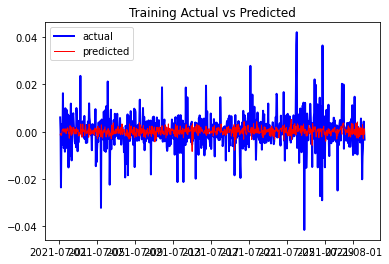

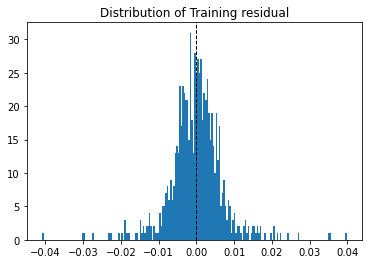

In [39]:
# graphs
model_graphs(predicted = train_predicted['Close_prices'], actual = train_actual['Close_prices'], title = 'Training')

In [40]:
# confusion matrix
train_confusion = confusion_matrix(predicted = train_predicted['Close_prices'], actual = train_actual['Close_prices'], title = 'Train')

{'true_positive': 242, 'true_negative': 190, 'false_positive': 184, 'false_negative': 153}

Metrics for [Train]
Accuracy: 0.562 
TP Rate:  0.613 
FP Rate:  0.492
TN Rate:  0.508 
FN Rate:  0.387

            [Train] Confusion Matrix

           |-------------|-------------|
  n= 769  | Predicted:  | Predicted:  |
           |    Down     |    Up       |
|----------|-------------|-------------|------------|
| Actual:  |             |             |            |
|  Down    |  tn: 190    |  fp: 184    |    374     |
|----------|-------------|-------------|------------|
| Actual:  |             |             |            |
|   UP     |  fn: 153    |  tp: 242    |    395    |
|----------|-------------|-------------|------------|
           |             |             |
           |      343    |      426   |
           |-------------|-------------|



In [41]:
# test results
# test_lag contains the last 'num_lag' number of observations of the training data in order to make the forecast for the first "real" test observation
test_lag = stationary_model.iloc[len(train) - num_lag :]
test_predicted = predict(data = test_lag, fitted_model = model_fit, lag_order = num_lag, predict_steps = 1)
test_actual = stationary_model.iloc[len(train) :]

0.007216210196112263
RMSE = 0.007216210196112263
 MAE = 0.005231088694909749


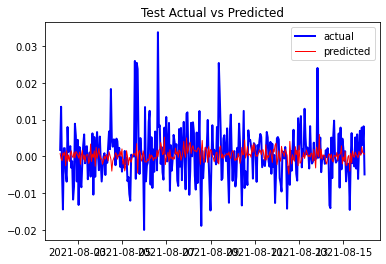

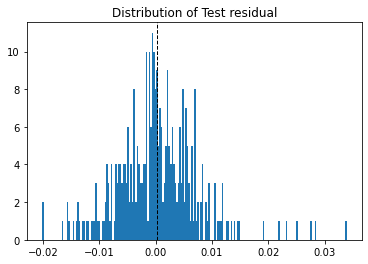

In [42]:
# graphs
model_graphs(predicted = test_predicted['Close_prices'], actual = test_actual['Close_prices'], title = 'Test')

In [43]:
# confusion matrix
test_confusion = confusion_matrix(predicted = test_predicted['Close_prices'], actual = test_actual['Close_prices'], title = 'Test')

{'true_positive': 113, 'false_positive': 81, 'true_negative': 74, 'false_negative': 63}

Metrics for [Test]
Accuracy: 0.565 
TP Rate:  0.642 
FP Rate:  0.523
TN Rate:  0.477 
FN Rate:  0.358

            [Test] Confusion Matrix

           |-------------|-------------|
  n= 331  | Predicted:  | Predicted:  |
           |    Down     |    Up       |
|----------|-------------|-------------|------------|
| Actual:  |             |             |            |
|  Down    |  tn: 74    |  fp: 81    |    155     |
|----------|-------------|-------------|------------|
| Actual:  |             |             |            |
|   UP     |  fn: 63    |  tp: 113    |    176    |
|----------|-------------|-------------|------------|
           |             |             |
           |      137    |      194   |
           |-------------|-------------|



**Model gives us 56.5% accuracy on test dataset which was evident from the granger causality test as well as none of the X variables granger caused Close prices except tweet like counts, Bitcoin Volume and Dow jones index**

Code Reference - https://github.com/pcann9/Predict_Bitcoin_Using_Reddit_Sentiment/blob/master/7_stationary_transformation.ipynb